# **Basic Data Visualization**

**Objectives:**

* Create bar plots, line charts, and scatter plots.
* Customize plot labels, titles, and legends.
* Export plots as images for reports.

### 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

### 2. Load Data

In [2]:
airBnb_df = pd.read_csv('D:\Codveda-Technologies\AB_NYC_2019_cleaned.csv')

airBnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Lisaroxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Visualization

##### 1. Bar Plot

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


C:\Users\Gunjan Kothari\AppData\Local\Temp\ipykernel_19004\1946571770.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="viridis", legend=True)


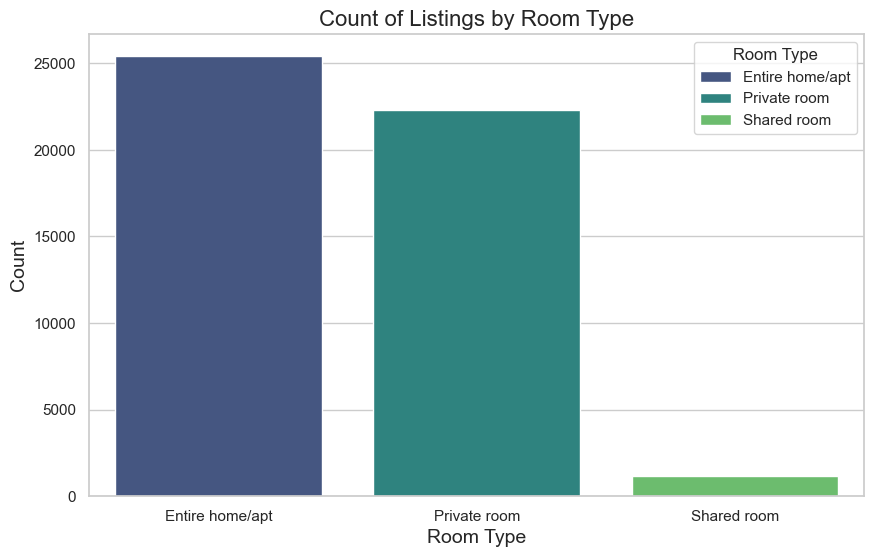

In [3]:
#Count of listings by room type
room_type_counts = airBnb_df["room_type"].value_counts()
print(room_type_counts)

#Bar plot

bar_plot = sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette="viridis", legend=True)
plt.title("Count of Listings by Room Type", fontsize=16)
plt.xlabel("Room Type", fontsize=14)
plt.ylabel("Count", fontsize=14)


# Add legend manually
handles = bar_plot.containers[0:3]
labels = room_type_counts.index.tolist()
bar_plot.legend(handles, labels, title="Room Type")


#Save plot
plt.savefig('room_type_counts.png', dpi=300, bbox_inches='tight')
plt.show()


**Interpretation of the bar plot for room_type_counts**

The bar plot visualizes the count of Airbnb listings by room type in the dataset. It shows that 'Entire home/apt' is the most common room type, followed by 'Private room', while 'Shared room' is the least common. This suggests that most hosts prefer to rent out entire properties, and guests are more likely to book entire homes or private rooms rather than shared spaces.

##### 2. Line Chart

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


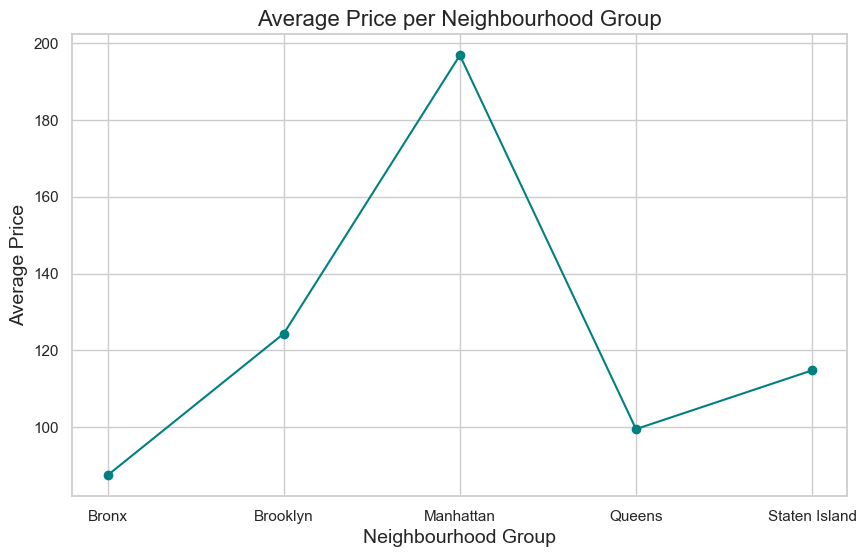

In [4]:
#average price per neighbourhood group
avg_price = airBnb_df.groupby("neighbourhood_group")["price"].mean().sort_index()
print(avg_price)

#Line chart
plt.plot(avg_price.index, avg_price.values, marker='o', linestyle='-', color='teal')
plt.title("Average Price per Neighbourhood Group", fontsize=16)
plt.xlabel("Neighbourhood Group", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.grid(True)

plt.savefig('avg_price_neighbourhood_group.png', dpi=300, bbox_inches='tight')
plt.show()

**Interpretation of the line chart for avg_price**

- The line chart displays the average Airbnb price for each neighbourhood group in NYC.
- It reveals that Manhattan has the highest average price, followed by Brooklyn.
- Queens, Staten Island, and the Bronx have lower average prices, with the Bronx being the most affordable.
- This suggests that location significantly influences Airbnb pricing, with central and popular areas commanding higher rates.


##### 3. Scatter Plot

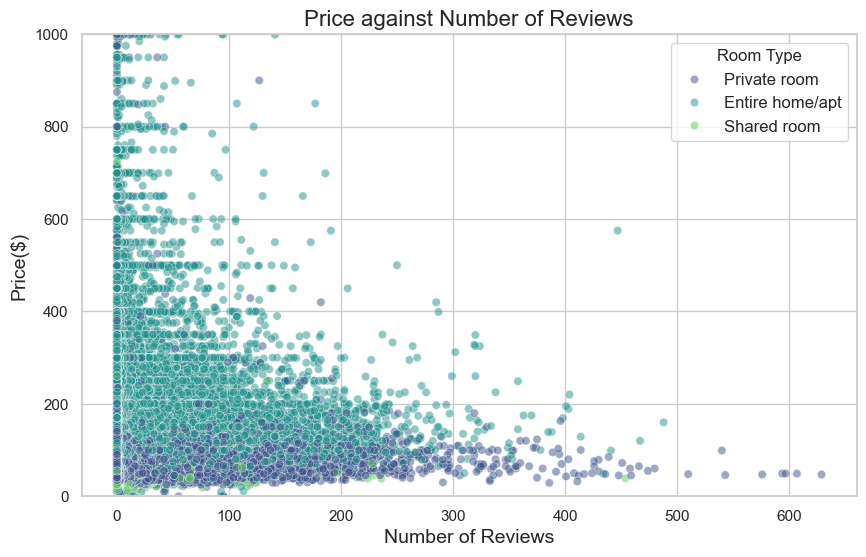

In [5]:
# Price vs. Number of Reviews

sns.scatterplot(data=airBnb_df, x="number_of_reviews", y="price", hue="room_type", palette="viridis", alpha=0.5)
plt.title("Price against Number of Reviews", fontsize=16)
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Price($)", fontsize=14)
plt.legend(title="Room Type", fontsize=12)
plt.ylim(0, 1000)

plt.savefig("price_vs_reviews.png", dpi=300, bbox_inches='tight')
plt.show()

**Interpretation of the scatter plot for price vs. number_of_reviews**

- The scatter plot visualizes the relationship between listing price and the number of reviews, colored by room type.
- Most listings are priced below $500, with a dense cluster of reviews at lower price points.
- Entire homes/apartments tend to have higher prices, while shared and private rooms are generally more affordable. 
- Listings with more reviews are often lower-priced, suggesting that affordability may drive higher booking and review frequency.
